Accuracy: 0.905


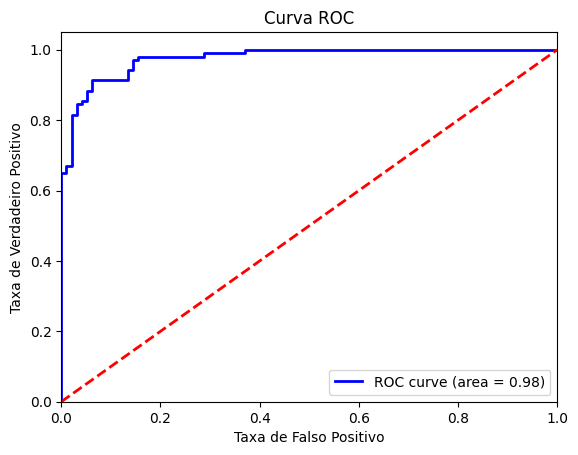

In [8]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import LabelEncoder


data = pd.read_csv('study_performance.csv')


X = data.drop('gender', axis=1)
y = data['gender']


X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)


X_train = pd.get_dummies(X_train)


model = LogisticRegression(max_iter=1000)

model.fit(X_train, y_train)


X_val = pd.get_dummies(X_val)
predictions = model.predict(X_val)


accuracy = (predictions == y_val).mean()
print("Accuracy:", accuracy)

probabilities = model.predict_proba(X_val)[:, 1]

label_encoder = LabelEncoder()
y_val_binary = label_encoder.fit_transform(y_val)


fpr, tpr, thresholds = roc_curve(y_val_binary, probabilities)
roc_auc = auc(fpr, tpr)


plt.figure()
plt.plot(fpr, tpr, color='blue', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='red', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Taxa de Falso Positivo')
plt.ylabel('Taxa de Verdadeiro Positivo')
plt.title('Curva ROC')
plt.legend(loc="lower right")
plt.show()
